## Temperature sweep of Stanford Nb LEKID test chip
### Photo of the chip installed before wirebonding

In [42]:
from IPython.display import Image

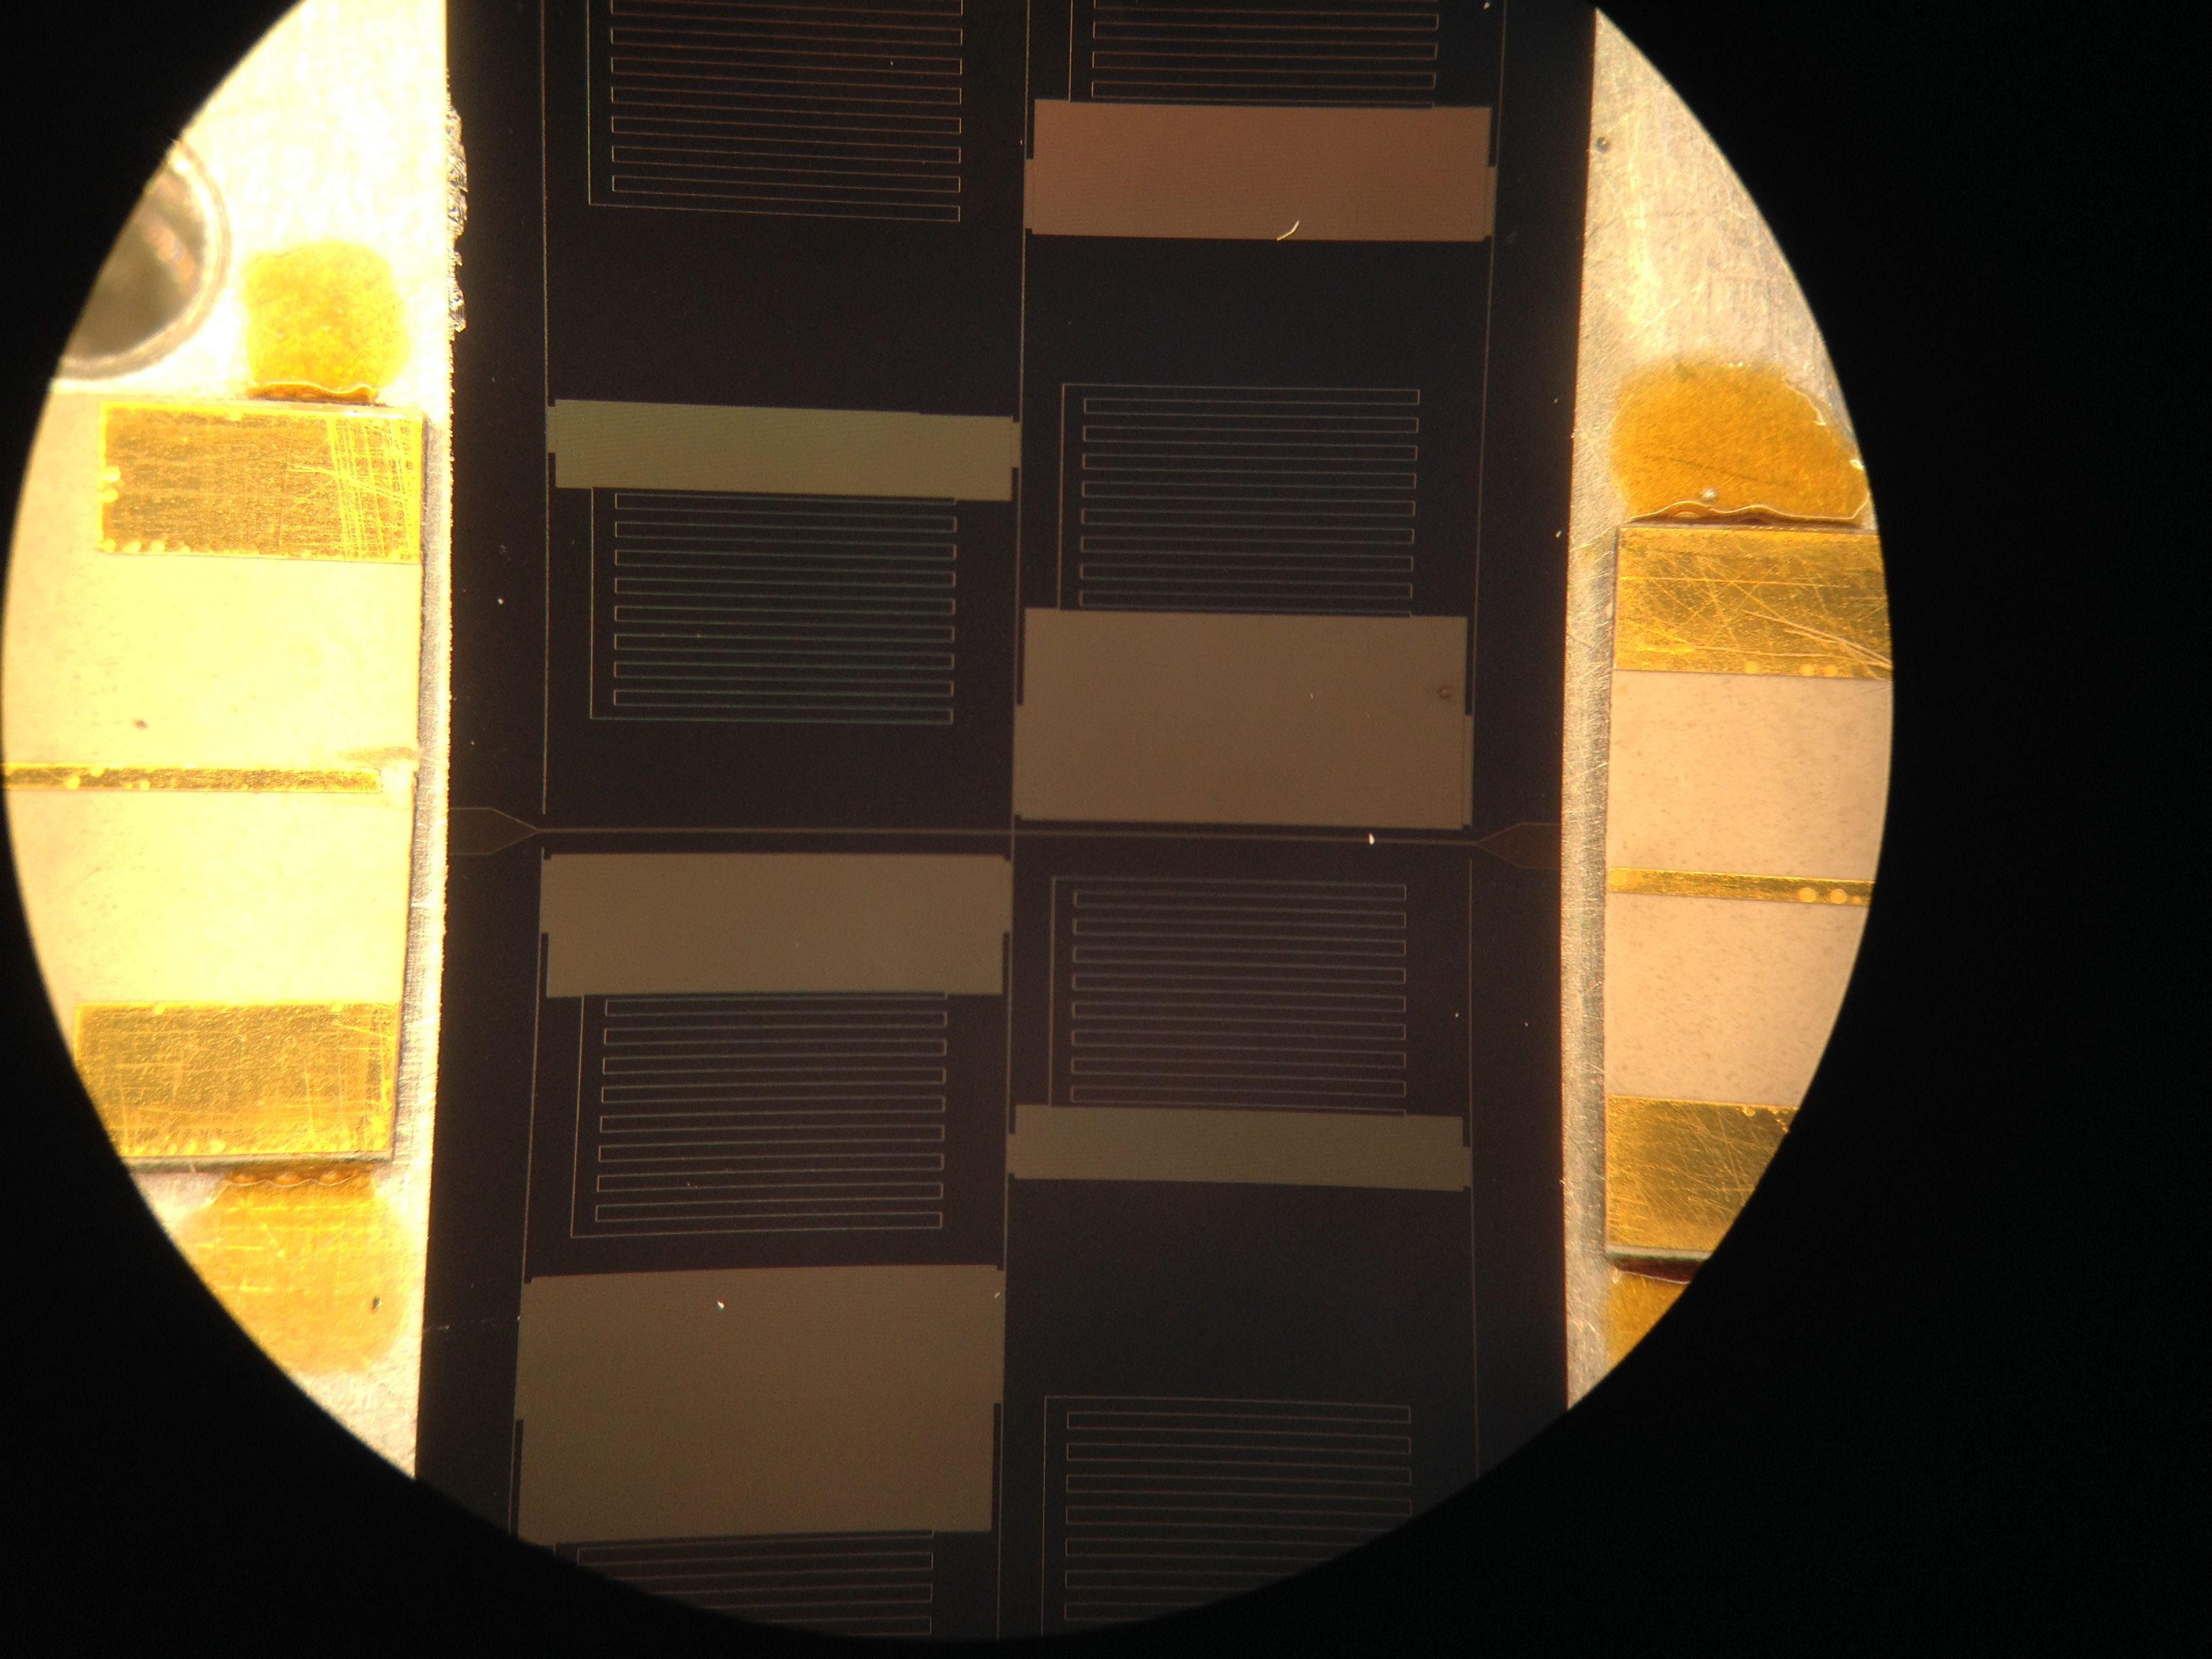

In [45]:
Image(filename='/artemis/photos/img_3361.jpg',width=1024)

### Test setup

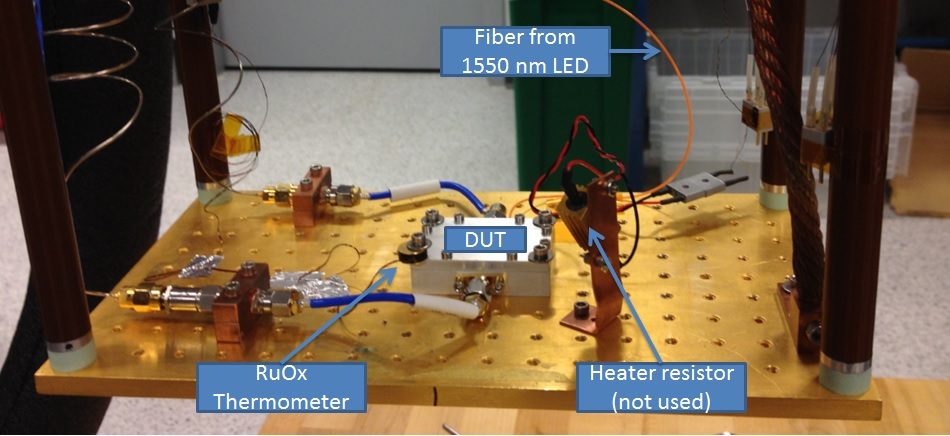

In [49]:
Image(url='https://www.dropbox.com/s/zp9l2s0b8uy4b16/2016-05-12-stanford-nb-lekid-test-setup.jpg?dl=1',embed=True,format='jpg')

## Get the data

In [1]:
%pylab inline
import seaborn as sns
sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from kid_readout.analysis.archive import load_archive

In [33]:
df = load_archive('/artemis/readout/archive/2016-05-12-stanford-Nb-LEKID-temperature-sweep.npy')
del df['index']
df = df[(df.number!=2) & (1e6/df.res_Q_i < 25)]

In [34]:
df.shape

(253, 54)

## Raw data: Sweeps through the resonator (bath temperature varying)

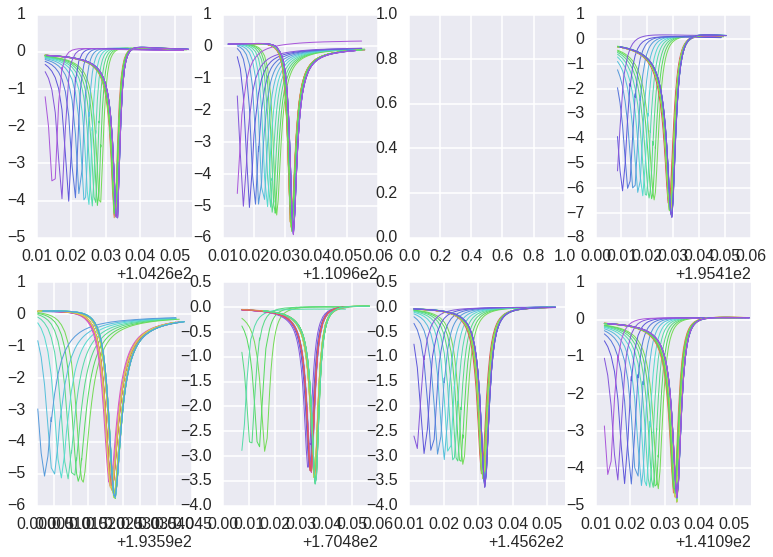

In [41]:
sns.set_palette(sns.palettes.hls_palette(21))
fig,axs = subplots(2,4)
for k,row in df.iterrows():
    ax = axs.flatten()[row.number]
    ax.plot(row.res_frequency_data/1e6,20*np.log10(np.abs(row.res_s21_data/row.res_A_mag)),lw=1)

## Fractional frequency shift vs. bath temperature

Strangely, these look just like data from aluminum LEKIDs. If you showed me this data and I didn't know any better, I'd guess these devices were made of aluminum....

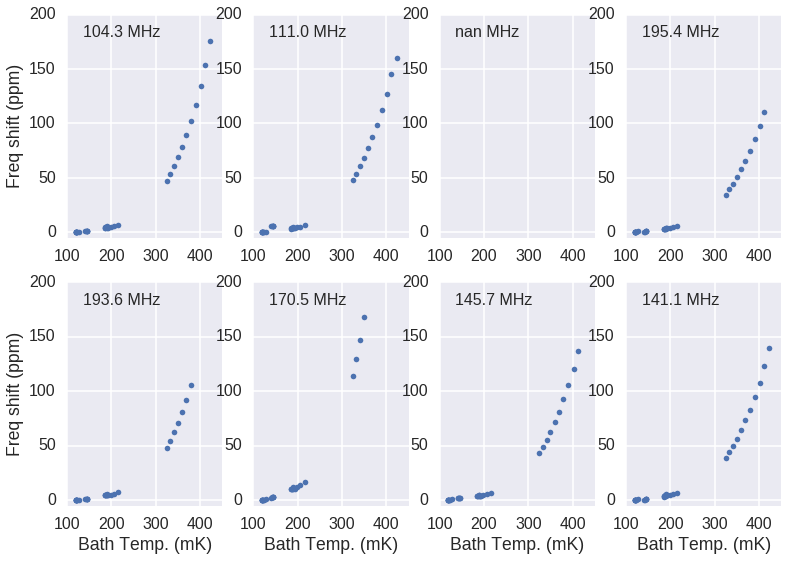

In [36]:
fig,axs = subplots(2,4)
for k in range(8):
    ax = axs.flatten()[k]
    dd = df[df.number==k]
    fmax = dd[dd.temperature_primary_package<0.2].res_f_0.max()
    ax.plot(1e3*dd.temperature_primary_package,1e6*(1-dd.res_f_0/fmax),'.')
    ax.text(0.1,0.9,('%.1f MHz' % (fmax/1e6)),transform=ax.transAxes)
    ax.xaxis.set_major_locator(plt.MultipleLocator(100))
    ax.set_ylim(-5,200)
    ax.set_xlim(100,450)
for ax in axs[:,0]:
    ax.set_ylabel('Freq shift (ppm)')
for ax in axs[1,:]:
    ax.set_xlabel('Bath Temp. (mK)')


## Inverse quality factor vs. bath temperature

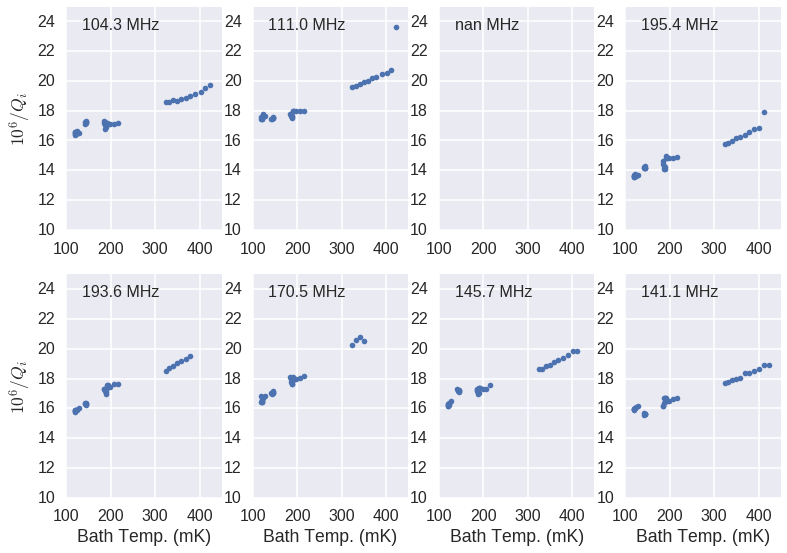

In [37]:
fig,axs = subplots(2,4)
for k in range(8):
    ax = axs.flatten()[k]
    dd = df[df.number==k]
    fmax = dd[dd.temperature_primary_package<0.2].res_f_0.max()
    ax.plot(1e3*dd.temperature_primary_package,1e6/dd.res_Q_i,'.')
    ax.text(0.1,0.9,('%.1f MHz' % (fmax/1e6)),transform=ax.transAxes)
    ax.xaxis.set_major_locator(plt.MultipleLocator(100))
    ax.set_ylim(10,25)
    ax.set_xlim(100,450)
for ax in axs[:,0]:
    ax.set_ylabel('$10^6/Q_i$')
for ax in axs[1,:]:
    ax.set_xlabel('Bath Temp. (mK)')
